In [423]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

In [600]:
#För att inspektera schema etc
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
   # print(eng)
    return create_engine(eng)


engine = new_engine('mssql', 'Holger-Dellen\MSSQLSERVER01', 'AdventureWorks2022', integrated_security=True)
connection = engine.connect()

inspector = inspect(engine)
#df = pd.read_sql(sql="SELECT * from Sales.SalesOrderHeader WHERE OrderDate >2012-01-01 AND OrderDate<2012-12-31", con=connection)
#print(df.head())

In [601]:
#Ta fram alla scheman
schemas = inspector.get_schema_names()

for schema in schemas:
    print(schema)
    
 

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [434]:
#Printa ut alla tabeller, scheman och nycklar
schemas = inspector.get_schema_names()
num_Schema=0
num_Tables=0

for schemat in schemas:
    print(schemat,': ')
    tables=inspector.get_table_names(schema=schemat)
  
    if len(tables)==0:
        print('no tables\n')
    else:
        num_Schema+=1
        print('With',len(tables), 'tables: ')
        for table in tables:
            print(table)
            num_Tables+=1
            #if len(inspector.get_pk_constraint(table))>0:
            print('Primary Key contraings',inspector.get_pk_constraint(table,schemat),'\n')

print('There are ',num_Schema,' Schemas with tables\n')
print('There are a total of ',num_Tables,' tables in the database')
           


db_accessadmin : 
no tables

db_backupoperator : 
no tables

db_datareader : 
no tables

db_datawriter : 
no tables

db_ddladmin : 
no tables

db_denydatareader : 
no tables

db_denydatawriter : 
no tables

db_owner : 
no tables

db_securityadmin : 
no tables

dbo : 
With 3 tables: 
AWBuildVersion
Primary Key contraings {'constrained_columns': ['SystemInformationID'], 'name': 'PK_AWBuildVersion_SystemInformationID', 'dialect_options': {'mssql_clustered': 1}} 

DatabaseLog
Primary Key contraings {'constrained_columns': ['DatabaseLogID'], 'name': 'PK_DatabaseLog_DatabaseLogID', 'dialect_options': {'mssql_clustered': 0}} 

ErrorLog
Primary Key contraings {'constrained_columns': ['ErrorLogID'], 'name': 'PK_ErrorLog_ErrorLogID', 'dialect_options': {'mssql_clustered': 1}} 

guest : 
no tables

HumanResources : 
With 6 tables: 
Department
Primary Key contraings {'constrained_columns': ['DepartmentID'], 'name': 'PK_Department_DepartmentID', 'dialect_options': {'mssql_clustered': 1}} 

Employee

# Descriptive information re the database


   Start_D  Num_Of_hired
0     2006             1
1     2007             6
2     2008            74
3     2009           149
4     2010            39
5     2011            18
6     2012             5
7     2013             4
296
296


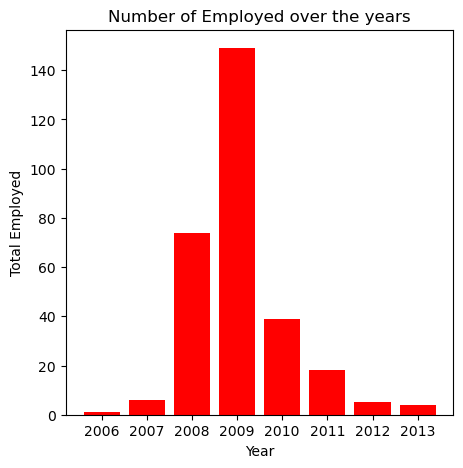

In [602]:
#Employee info,data och graf över antalet anställda över åren. 
multijoin_sql ="""
SELECT YEAR(PH.StartDate) AS Start_D, COUNT(*) AS Num_Of_hired
FROM HumanResources.EmployeeDepartmentHistory AS PH
GROUP BY YEAR(PH.StartDate)
ORDEr BY Start_D
"""
join_df = pd.read_sql(sql=multijoin_sql, con=connection)
print(join_df.head(12))


print(join_df.Num_Of_hired.sum())
print(join_df['Num_Of_hired'].sum())

fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(join_df['Start_D'],join_df['Num_Of_hired'],color='r')
ax.set_title('Number of Employed over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Employed')
plt.show()



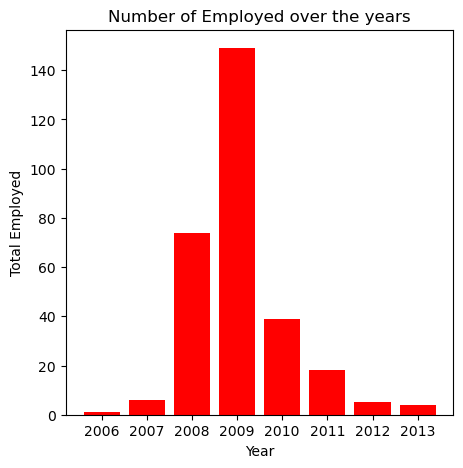

In [392]:

#If they are men or Women
Emp_demo_sql ="""
 SELECT P.BusinessEntityID, P.JobTitle, P.MaritalStatus, P.Gender,P.BirthDate,P.HireDate,P.VacationHours, P.SickLeaveHours,
PH.StartDate, PH.EndDate, 
YEAR(PH.StartDate) AS S_year, 
YEAR(PH.EndDate) AS E_Year,
PD.Name as 'Dep_Name', PD.GroupName
from HumanResources.Employee AS P 
INNER JOIN HumanResources.EmployeeDepartmentHistory AS PH 
    ON P.BusinessEntityID = PH.BusinessEntityID
INNER JOIN HumanResources.Department AS PD 
    ON PH.DepartmentID = PD.DepartmentID
	GROUP BY YEAR(PH.StartDate), P.BusinessEntityID, P.JobTitle, P.MaritalStatus, P.Gender,P.BirthDate,P.HireDate,P.VacationHours, P.SickLeaveHours,
PH.StartDate, PH.EndDate,PD.Name,PD.GroupName
"""
Demo_df = pd.read_sql(sql=Emp_demo_sql, con=connection)


# Plot with list
fig, ax = plt.subplots(figsize=(5, 5))
#ax.bar(years, freq)
ax.bar(join_df['Start_D'],join_df['Num_Of_hired'],color='r')
ax.set_title('Number of Employed over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Employed')
plt.show()


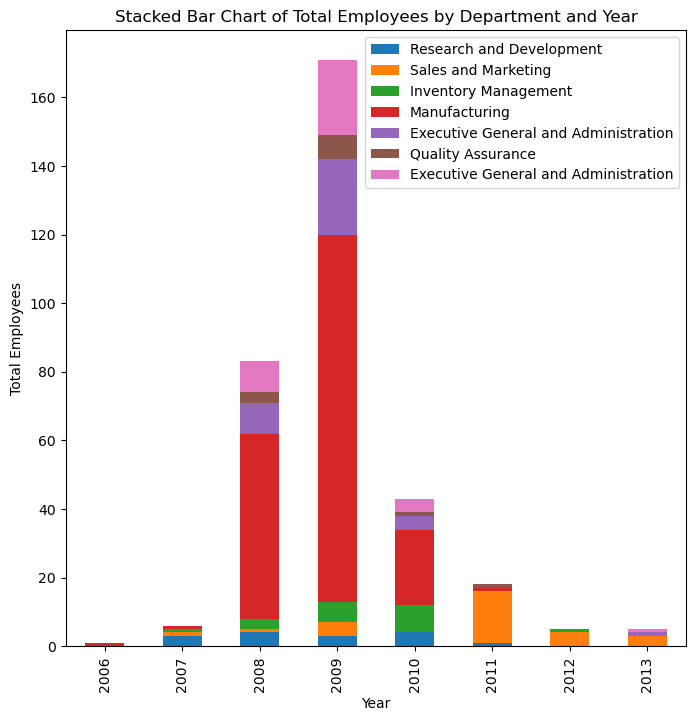

,Research and Development,Sales and Marketing,Inventory Management,Manufacturing,Executive General and Administration,Quality Assurance,Executive General and Administration
hire_year,,,,,,,
2006,0,0,0,1,0,0,0
2007,3,1,1,1,0,0,0
2008,4,1,3,54,9,3,9
2009,3,4,6,107,22,7,22
2010,4,0,8,22,4,1,4
2011,1,15,0,1,0,1,0
2012,0,4,1,0,0,0,0
2013,0,3,0,0,1,0,1


In [330]:
#Hur många anställda är det per och och per avdlening
Emp_hire_sql ="""
 SELECT 
    hire_year,
    SUM(CASE WHEN DepartmentName = 'Research and Development' THEN DepartmentCount ELSE 0 END) AS 'Research and Development',
    SUM(CASE WHEN DepartmentName = 'Sales and Marketing' THEN DepartmentCount ELSE 0 END) AS 'Sales and Marketing',
    SUM(CASE WHEN DepartmentName = 'Inventory Management' THEN DepartmentCount ELSE 0 END) AS 'Inventory Management',
    SUM(CASE WHEN DepartmentName = 'Manufacturing' THEN DepartmentCount ELSE 0 END) AS 'Manufacturing',
    SUM(CASE WHEN DepartmentName = 'Executive General and Administration' THEN DepartmentCount ELSE 0 END) AS 'Executive General and Administration',
    SUM(CASE WHEN DepartmentName = 'Quality Assurance' THEN DepartmentCount ELSE 0 END) AS 'Quality Assurance',
    SUM(CASE WHEN DepartmentName = 'Executive General and Administration' THEN DepartmentCount ELSE 0 END) AS 'Executive General and Administration'
 
FROM (
    SELECT 
        YEAR(PH.StartDate) AS hire_year,
        PD.GroupName AS DepartmentName,
        COUNT(*) AS DepartmentCount,
        COUNT(*) AS TotalCount
    FROM 
        HumanResources.Employee AS P 
        INNER JOIN HumanResources.EmployeeDepartmentHistory AS PH ON P.BusinessEntityID = PH.BusinessEntityID
        INNER JOIN HumanResources.Department AS PD ON PH.DepartmentID = PD.DepartmentID
    GROUP BY 
        YEAR(PH.StartDate), PD.GroupName
) AS subquery
GROUP BY 
    hire_year
ORDER BY 
    hire_year;
"""

df = pd.read_sql(sql=Emp_hire_sql, con=connection)
# Set the 'hire_year' column as the index
df.set_index('hire_year', inplace=True)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))


# Plot stacked bar chart
df.plot(kind='bar', stacked=True, ax=ax)


# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Employees')
ax.set_title('Stacked Bar Chart of Total Employees by Department and Year')

# Show the plot
plt.show()
df.head(10)

# Employees with start of selling products and sales

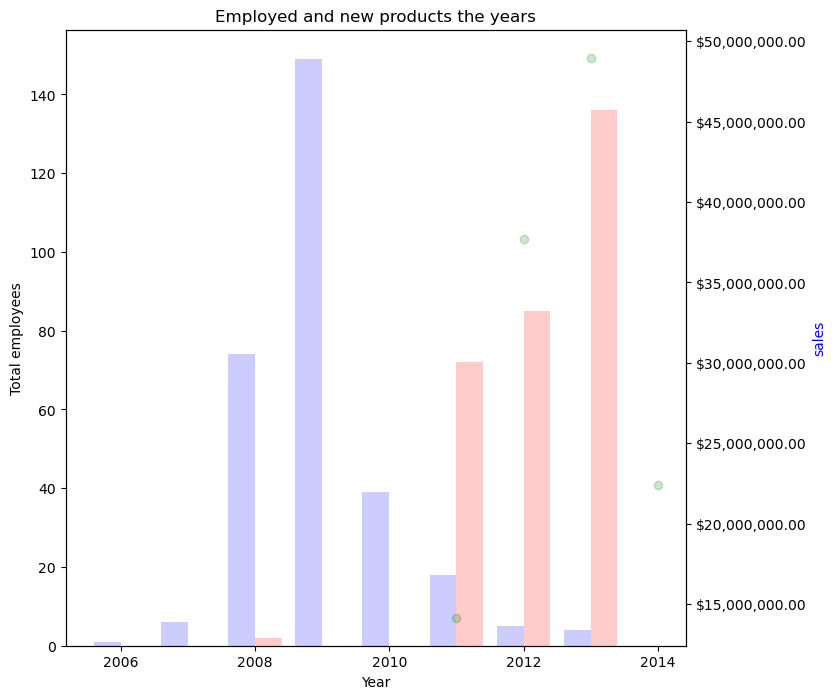

,Year_Start,Bikes,Components,Clothing,Accessories,total_new_prod_per_year
0,2008,0,2,0,0,2
1,2011,30,32,7,3,72
2,2012,23,39,16,7,85
3,2013,44,61,12,19,136


In [604]:
#SQL för att få anställda, producerade produkter och sålda produkter. 
Emp_hire_sql ="""
 SELECT 
    hire_year,
    SUM(CASE WHEN DepartmentName = 'Research and Development' THEN DepartmentCount ELSE 0 END) AS 'Research and Development',
    SUM(CASE WHEN DepartmentName = 'Sales and Marketing' THEN DepartmentCount ELSE 0 END) AS 'Sales and Marketing',
    SUM(CASE WHEN DepartmentName = 'Inventory Management' THEN DepartmentCount ELSE 0 END) AS 'Inventory Management',
    SUM(CASE WHEN DepartmentName = 'Manufacturing' THEN DepartmentCount ELSE 0 END) AS 'Manufacturing',
    SUM(CASE WHEN DepartmentName = 'Executive General and Administration' THEN DepartmentCount ELSE 0 END) AS 'Executive General and Administration',
    SUM(CASE WHEN DepartmentName = 'Quality Assurance' THEN DepartmentCount ELSE 0 END) AS 'Quality Assurance',
    SUM(CASE WHEN DepartmentName = 'Executive General and Administration' THEN DepartmentCount ELSE 0 END) AS 'Executive General and Administration'
     ,SUM(TotalCount) AS total_employees_per_year
FROM (
    SELECT 
        YEAR(PH.StartDate) AS hire_year,
        PD.GroupName AS DepartmentName,
        COUNT(*) AS DepartmentCount,
        COUNT(*) AS TotalCount
    FROM 
        HumanResources.Employee AS P 
        INNER JOIN HumanResources.EmployeeDepartmentHistory AS PH ON P.BusinessEntityID = PH.BusinessEntityID
        INNER JOIN HumanResources.Department AS PD ON PH.DepartmentID = PD.DepartmentID
    GROUP BY 
        YEAR(PH.StartDate), PD.GroupName
) AS subquery
GROUP BY 
    hire_year
ORDER BY 
    hire_year;
"""

df = pd.read_sql(sql=Emp_hire_sql, con=connection)

#SQL To get new products to sell per category
Sales_sql ="""
SELECT 
    YEAR(OrderDate) AS SalesYear, 
    ROUND(SUM(TotalDue), 2) AS TotalSales 
FROM Sales.SalesOrderHeader 
GROUP BY YEAR(OrderDate)
ORDER BY SalesYear;
"""
df_sales = pd.read_sql(sql=Sales_sql, con=connection)

Prod_sql ="""
SELECT 
    Year_Start,
    SUM(CASE WHEN Prod_cat_Name = 'Bikes' THEN Total_prod_count ELSE 0 END) AS 'Bikes',
    SUM(CASE WHEN Prod_cat_Name = 'Components' THEN Total_prod_count ELSE 0 END) AS 'Components',
    SUM(CASE WHEN Prod_cat_Name = 'Clothing' THEN Total_prod_count ELSE 0 END) AS 'Clothing',
    SUM(CASE WHEN Prod_cat_Name = 'Accessories' THEN Total_prod_count ELSE 0 END) AS 'Accessories',
   SUM(TotalCount) AS total_new_prod_per_year
FROM (
	SELECT
	YEAR(PP.SellStartDate) as Year_Start,
	PC.Name AS Prod_cat_Name,
	Count(*) AS Total_prod_count,
	 COUNT(*) AS TotalCount
	FROM Production.Product AS PP
	INNER JOIN Production.ProductSubcategory AS PSC ON PP.ProductSubcategoryID = PSC.ProductSubcategoryID
	INNER JOIN Production.ProductCategory AS PC On PSC.ProductCategoryID = PC.ProductCategoryID
	GROUP BY YEAR(PP.SellStartDate), PC.Name
) AS subquery
GROUP BY 
    Year_Start
ORDER BY 
    Year_Start
    """

df_prod = pd.read_sql(sql=Prod_sql, con=connection)



# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax2 = ax.twinx()

#Funktion för att formatera till dollar
def dollar_formatter(x, pos):
    return "${:,.2f}".format(x)
ax2.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

width = 0.3

# Plot stacked bar chart
ax.bar(df['hire_year']- 0.2,df['total_employees_per_year'],0.4,color='b',alpha=0.2)
ax.bar(df_prod['Year_Start'] + 0.2,df_prod['total_new_prod_per_year'],0.4,color='r',alpha=0.2)

#FORTSÄTT HÄR
ax2.scatter(df_sales['SalesYear'],df_sales['TotalSales'],color='g',alpha=0.2)

ax.set_title('Employed and new products the years')
ax.set_xlabel('Year')
ax.set_ylabel('Total employees')
ax2.set_ylabel('sales', color='b')



plt.show()
df_prod.head(10)

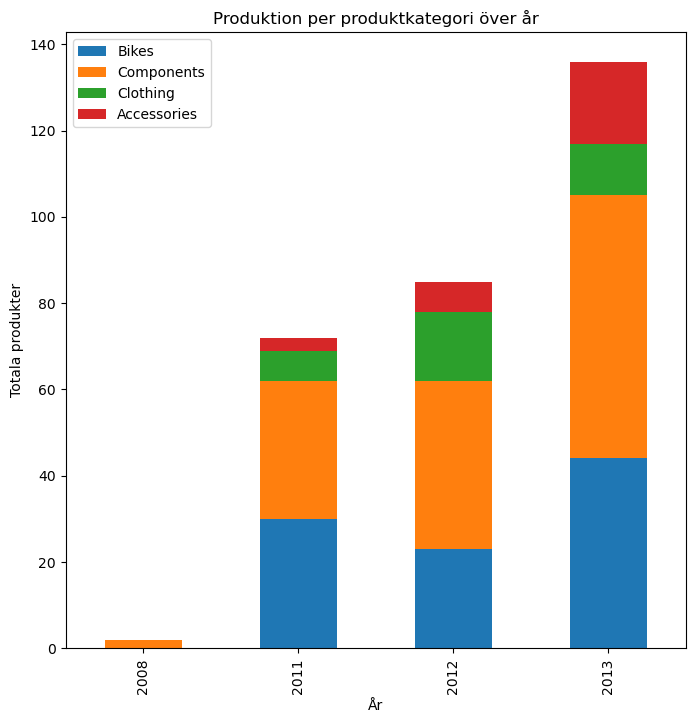

,Bikes,Components,Clothing,Accessories
Year_Start,,,,
2008,0,2,0,0
2011,30,32,7,3
2012,23,39,16,7
2013,44,61,12,19


In [606]:
#Prodution, när man började sälja produkter samt inom vilken kategori

Prod_sql2 ="""
SELECT 
    Year_Start,
    SUM(CASE WHEN Prod_cat_Name = 'Bikes' THEN Total_prod_count ELSE 0 END) AS 'Bikes',
    SUM(CASE WHEN Prod_cat_Name = 'Components' THEN Total_prod_count ELSE 0 END) AS 'Components',
    SUM(CASE WHEN Prod_cat_Name = 'Clothing' THEN Total_prod_count ELSE 0 END) AS 'Clothing',
    SUM(CASE WHEN Prod_cat_Name = 'Accessories' THEN Total_prod_count ELSE 0 END) AS 'Accessories'
 
FROM (
	SELECT
	YEAR(PP.SellStartDate) as Year_Start,
	PC.Name AS Prod_cat_Name,
	Count(*) AS Total_prod_count,
	 COUNT(*) AS TotalCount
	FROM Production.Product AS PP
	INNER JOIN Production.ProductSubcategory AS PSC ON PP.ProductSubcategoryID = PSC.ProductSubcategoryID
	INNER JOIN Production.ProductCategory AS PC On PSC.ProductCategoryID = PC.ProductCategoryID
	GROUP BY YEAR(PP.SellStartDate), PC.Name
) AS subquery
GROUP BY 
    Year_Start
ORDER BY 
    Year_Start
    """

df_prod2 = pd.read_sql(sql=Prod_sql2, con=connection)
df_prod2.set_index('Year_Start', inplace=True)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

width = 0.3

df_prod2.plot(kind='bar', stacked=True, ax=ax)


ax.set_title('Produktion per produktkategori över år')
ax.set_xlabel('År')
ax.set_ylabel('Totala produkter')


# Show the plot
plt.show()
df_prod2.head(10)

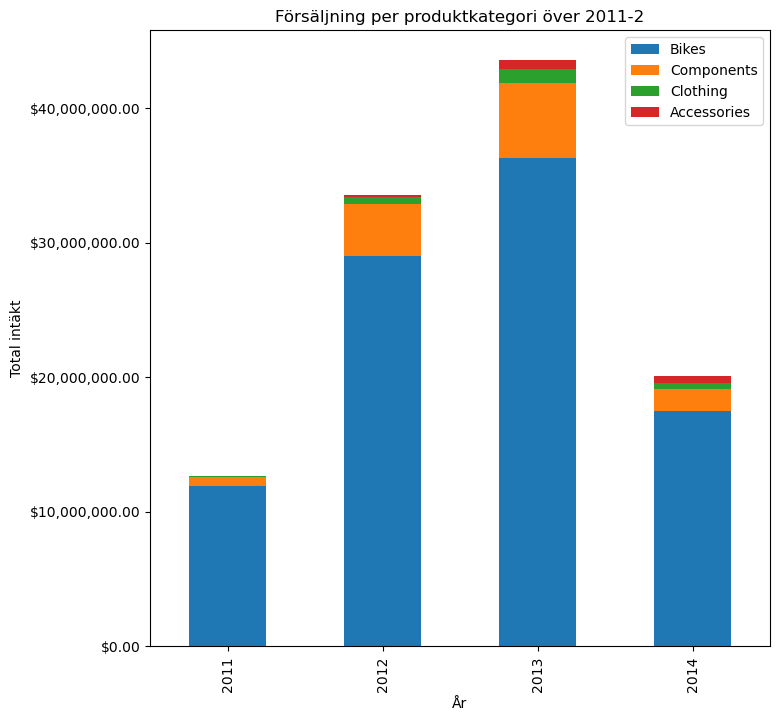

,Bikes,Components,Clothing,Accessories
SalesYear,,,,
2011,1.194565e+07,6.391730e+05,3.603148e+04,20820.773108
2012,2.898552e+07,3.880758e+06,5.555877e+05,102439.820714
2013,3.626683e+07,5.612935e+06,1.067690e+06,675024.650961
2014,1.745318e+07,1.669727e+06,4.612336e+05,473787.639143


In [607]:
#Försäljning av produkter per produktkategor över åren
Prod_sqlSales ="""
WITH Prod_Cat_CTE (ProductID, Prd_catName)
AS
(
    SELECT DISTINCT
        PP.ProductID AS ProductID,
        PC.Name AS Prd_catName
    FROM Production.Product AS PP
    INNER JOIN Production.ProductSubcategory AS PSC ON PP.ProductSubcategoryID = PSC.ProductSubcategoryID
    INNER JOIN Production.ProductCategory AS PC ON PSC.ProductCategoryID = PC.ProductCategoryID
)

SELECT 
    SalesYear,
    SUM(CASE WHEN Prd_catName = 'Bikes' THEN TotalSales ELSE 0 END) AS 'Bikes',
    SUM(CASE WHEN Prd_catName = 'Components' THEN TotalSales ELSE 0 END) AS 'Components',
    SUM(CASE WHEN Prd_catName = 'Clothing' THEN TotalSales ELSE 0 END) AS 'Clothing',
    SUM(CASE WHEN Prd_catName = 'Accessories' THEN TotalSales ELSE 0 END) AS 'Accessories'
FROM (
    SELECT
        YEAR(ODH.OrderDate) AS SalesYear,
        PP.Prd_catName,
        SUM(OD.LineTotal) AS TotalSales
    FROM 
        Sales.SalesOrderDetail OD
        LEFT JOIN Sales.SalesOrderHeader ODH ON ODH.SalesOrderID = OD.SalesOrderID
        LEFT JOIN Prod_Cat_CTE PP ON OD.ProductID = PP.ProductID
    GROUP BY 
        YEAR(ODH.OrderDate), PP.Prd_catName
) AS subquery
GROUP BY 
    SalesYear
ORDER BY 
    SalesYear;

"""
df_Sales = pd.read_sql(sql=Prod_sqlSales, con=connection)
df_Sales.set_index('SalesYear', inplace=True)
fig, ax_S = plt.subplots(figsize=(8, 8))
df_Sales.plot(kind='bar', stacked=True, ax=ax_S)

def dollar_formatter(x, pos):
    return "${:,.2f}".format(x)
ax_S.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))


ax_S.set_title('Försäljning per produktkategori över 2011-2')
ax_S.set_xlabel('År')
ax_S.set_ylabel('Total intäkt')


# Show the plot
plt.show()
df_Sales.head(10)


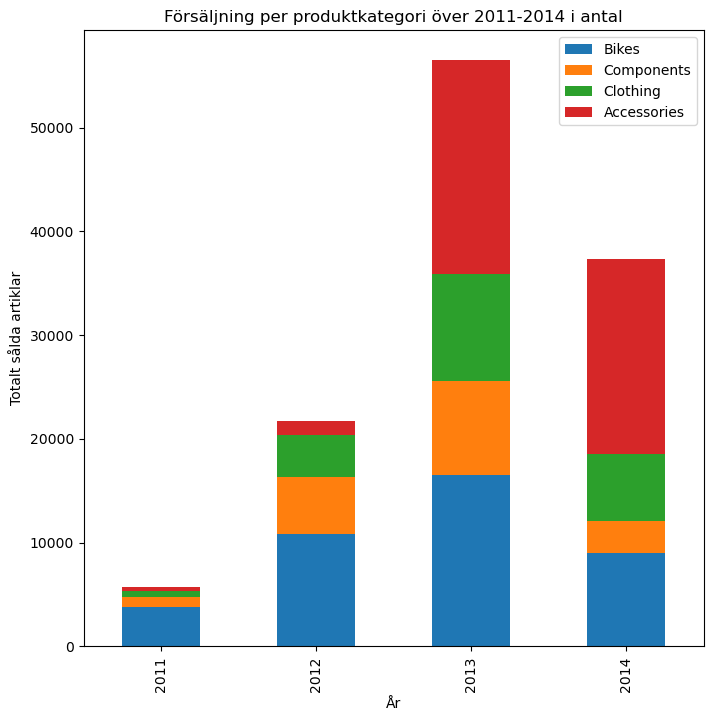

,Bikes,Components,Clothing,Accessories
SalesYear,,,,
2011,3826,875,655,360
2012,10776,5529,4045,1339
2013,16485,9138,10266,20684
2014,8944,3156,6428,18811


In [455]:
#Försäljning i antal ordrar över år per produktkategi
Prod_sqlSalesUnit ="""
	WITH Prod_Cat_CTE (ProductID, Prd_catName)
AS
(
    SELECT DISTINCT
        PP.ProductID AS ProductID,
        PC.Name AS Prd_catName
    FROM Production.Product AS PP
    INNER JOIN Production.ProductSubcategory AS PSC ON PP.ProductSubcategoryID = PSC.ProductSubcategoryID
    INNER JOIN Production.ProductCategory AS PC ON PSC.ProductCategoryID = PC.ProductCategoryID
)

SELECT 
    SalesYear,
    SUM(CASE WHEN Prd_catName = 'Bikes' THEN TotalUnitSold ELSE 0 END) AS 'Bikes',
    SUM(CASE WHEN Prd_catName = 'Components' THEN TotalUnitSold ELSE 0 END) AS 'Components',
    SUM(CASE WHEN Prd_catName = 'Clothing' THEN TotalUnitSold ELSE 0 END) AS 'Clothing',
    SUM(CASE WHEN Prd_catName = 'Accessories' THEN TotalUnitSold ELSE 0 END) AS 'Accessories'
FROM (
    SELECT
        YEAR(ODH.OrderDate) AS SalesYear,
        PP.Prd_catName,
        SUM(OD.LineTotal) AS TotalSales,
		COUNT(*) AS TotalUnitSold
    FROM 
        Sales.SalesOrderDetail OD
        LEFT JOIN Sales.SalesOrderHeader ODH ON ODH.SalesOrderID = OD.SalesOrderID
        LEFT JOIN Prod_Cat_CTE PP ON OD.ProductID = PP.ProductID
    GROUP BY 
        YEAR(ODH.OrderDate), PP.Prd_catName
) AS subquery
GROUP BY 
    SalesYear
ORDER BY 
    SalesYear;


"""
df_Sales2 = pd.read_sql(sql=Prod_sqlSalesUnit, con=connection)
df_Sales2.set_index('SalesYear', inplace=True)
fig, ax_S = plt.subplots(figsize=(8, 8))
df_Sales2.plot(kind='bar', stacked=True, ax=ax_S)
#FORTSÄTT HÄR
#ax2.scatter(df_sales['SalesYear'],df_sales['TotalSales'],color='g',alpha=0.2)

# Apply the custom formatter to the secondary y-axis, importing matplotlib.ticker import FuncFormatter and create a dollar formatter function
def dollar_formatter(x, pos):
    return "${:,.2f}".format(x)
#ax_S.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))


ax_S.set_title('Försäljning per produktkategori över 2011-2014 i antal')
ax_S.set_xlabel('År')
ax_S.set_ylabel('Totalt sålda artiklar')
#ax2.set_ylabel('sales', color='b')


# Show the plot
plt.show()
df_Sales2.head(10)


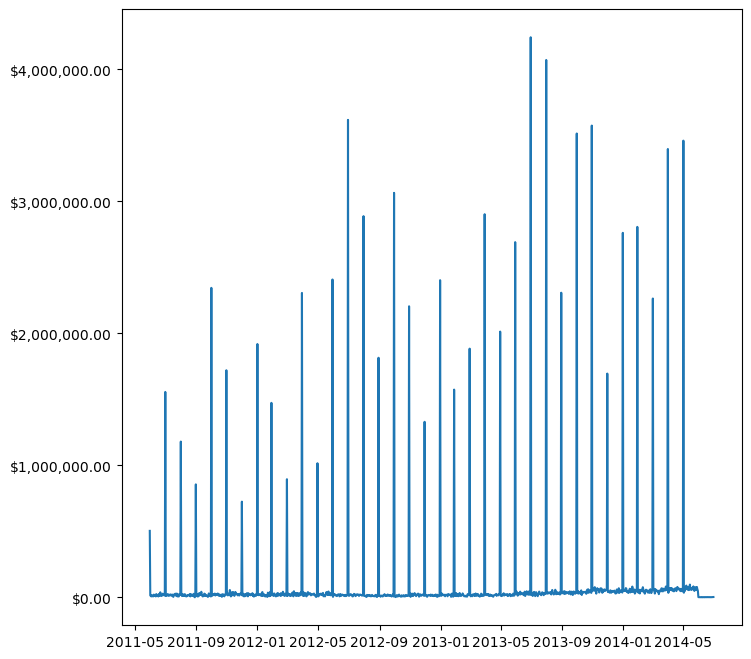

,SalesDay,TotalSales
0,2011-05-31,503805.9169
1,2011-06-01,13931.5200
2,2011-06-02,15012.1782
3,2011-06-03,7156.5400
4,2011-06-04,15012.1782
5,2011-06-05,14313.0800
6,2011-06-06,7855.6382
7,2011-06-07,7855.6382
8,2011-06-08,20909.7800
9,2011-06-09,10556.5300


In [471]:
#Försäljning per dag över alla år.
Prod_sqlSalesDate ="""
	  SELECT
       CAST(OD.OrderDate AS DATE) AS SalesDay,
        SUM(OD.SubTotal) AS TotalSales
    FROM 
        Sales.SalesOrderHeader OD

GROUP BY CAST(OD.OrderDate AS DATE)
	ORDER BY   CAST(OD.OrderDate AS DATE)
    """
df_Sales3 = pd.read_sql(sql=Prod_sqlSalesDate, con=connection)
fig, ax_S2 = plt.subplots(figsize=(8, 8))
ax_S2.plot(df_Sales3['SalesDay'], df_Sales3['TotalSales'])

# Apply the custom formatter to the secondary y-axis, importing matplotlib.ticker import FuncFormatter and create a dollar formatter function
def dollar_formatter(x, pos):
    return "${:,.2f}".format(x)
ax_S2.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))


ax_S.set_title('Försäljning per produktkategori över 2011-2014 i antal')
ax_S.set_xlabel('År')
ax_S.set_ylabel('Totalt sålda artiklar')
#ax2.set_ylabel('sales', color='b')


# Show the plot
plt.show()
df_Sales3.head(10)

C:\Users\magda\AppData\Local\Temp\ipykernel_20352\1962657124.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_Su[0].set_xticklabels(ax_Su[0].get_xticklabels(), rotation=30, ha='right')
C:\Users\magda\AppData\Local\Temp\ipykernel_20352\1962657124.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_Su[1].set_xticklabels(ax_Su[1].get_xticklabels(), rotation=30, ha='right')
C:\Users\magda\AppData\Local\Temp\ipykernel_20352\1962657124.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_Su[2].set_xticklabels(ax_Su[2].get_xticklabels(), rotation=30, ha='right')


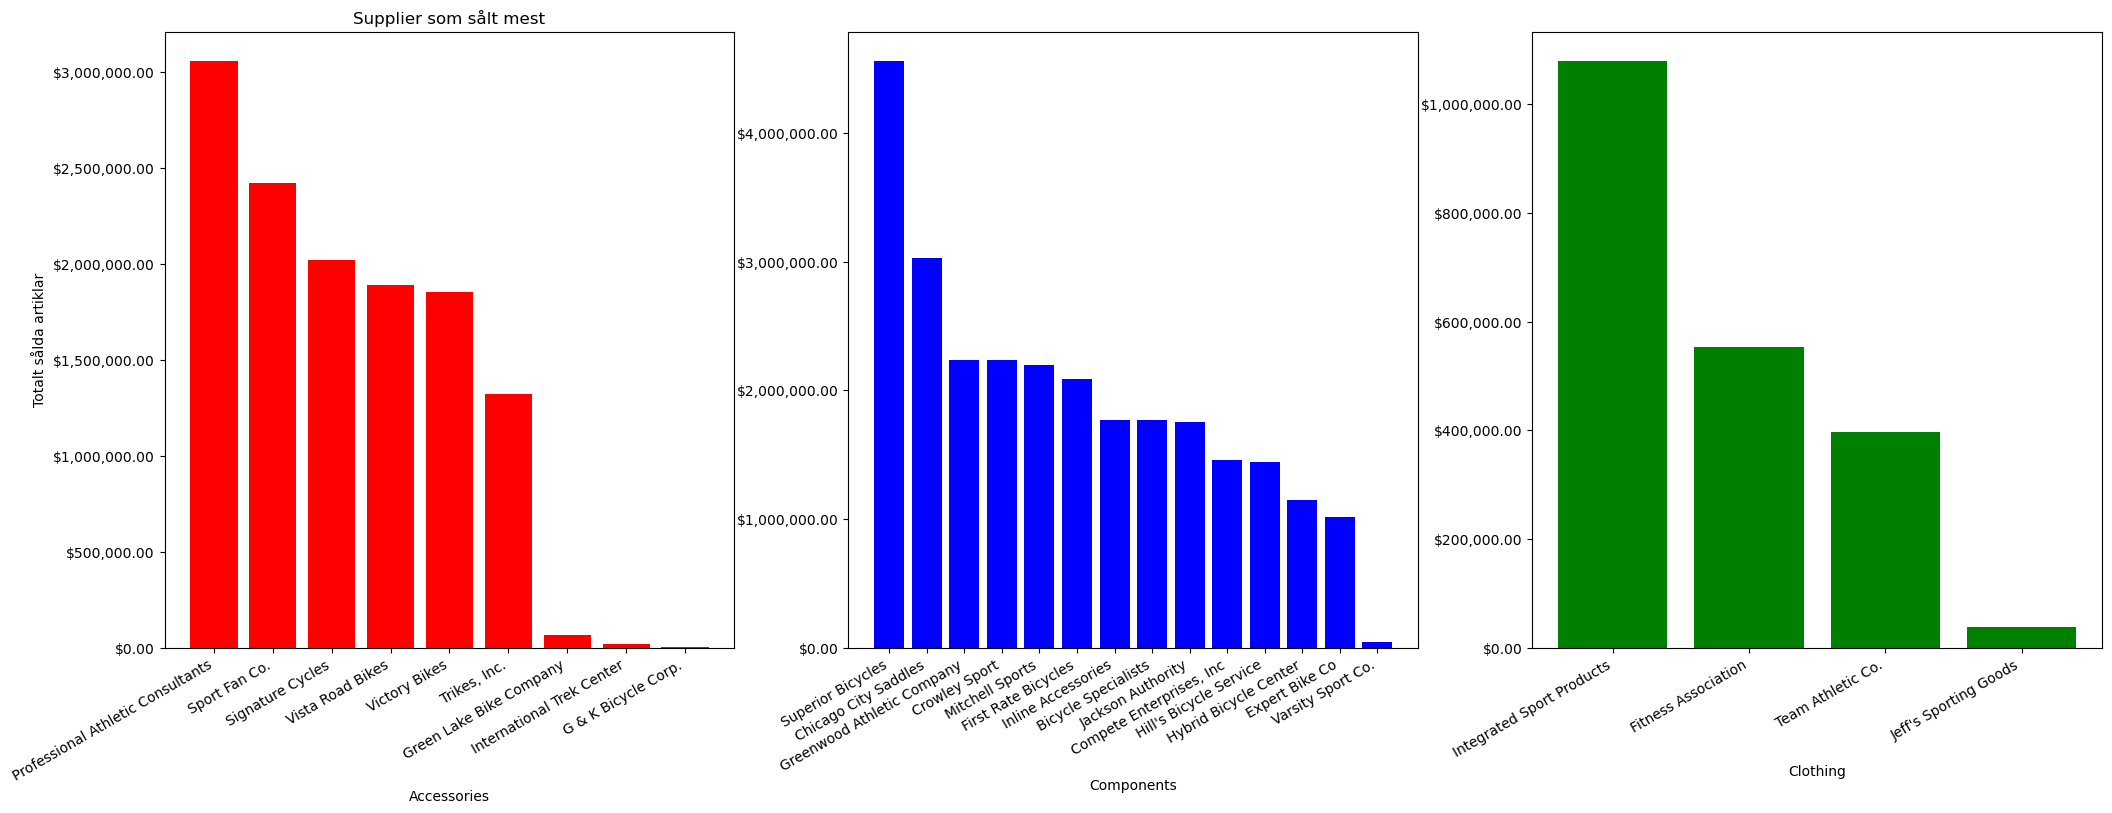

,CategoryName,VendorName,TotalOrders,TotalSpent
0,Accessories,Professional Athletic Consultants,50,3058774.950
1,Accessories,Sport Fan Co.,50,2421619.200
2,Accessories,Signature Cycles,50,2023560.000
3,Accessories,Vista Road Bikes,50,1892178.750
4,Accessories,Victory Bikes,50,1857170.700
5,Accessories,"Trikes, Inc.",50,1322763.750
6,Accessories,Green Lake Bike Company,2,69407.500
7,Accessories,International Trek Center,1,21882.500
8,Accessories,G & K Bicycle Corp.,1,4578.315


In [532]:
#Vilka supplier ger mest intäkt
#SUPPLIER ACCESSORIES
Supp_sql ="""
SELECT 
PC.Name AS CategoryName, 
V.Name AS VendorName,
    COUNT(DISTINCT PO.PurchaseOrderID) AS TotalOrders,
    SUM(pod.OrderQty * pod.UnitPrice) AS TotalSpent
FROM Production.Product AS P
JOIN Production.ProductSubcategory AS pcs ON pcs.ProductSubcategoryID = P.ProductSubcategoryID
JOIN Production.ProductCategory AS pc ON PC.ProductCategoryID = pcs.ProductCategoryID
JOIN Purchasing.PurchaseOrderDetail AS pod ON pod.ProductID = P.ProductID
JOIN Purchasing.PurchaseOrderHeader AS po ON po.PurchaseOrderID = pod.PurchaseOrderID
JOIN Purchasing.Vendor AS V ON v.BusinessEntityID = PO.VendorID
WHERE PC.Name ='Accessories'
GROUP BY pc.Name, V.Name
ORDER BY pc.Name ASC, TotalSpent DESC
"""
df_Supp = pd.read_sql(sql=Supp_sql, con=connection)
# SUPPLIER COMPONENTS
Supp_sql1 ="""
SELECT 
PC.Name AS CategoryName, 
V.Name AS VendorName,
    COUNT(DISTINCT PO.PurchaseOrderID) AS TotalOrders,
    SUM(pod.OrderQty * pod.UnitPrice) AS TotalSpent
FROM Production.Product AS P
JOIN Production.ProductSubcategory AS pcs ON pcs.ProductSubcategoryID = P.ProductSubcategoryID
JOIN Production.ProductCategory AS pc ON PC.ProductCategoryID = pcs.ProductCategoryID
JOIN Purchasing.PurchaseOrderDetail AS pod ON pod.ProductID = P.ProductID
JOIN Purchasing.PurchaseOrderHeader AS po ON po.PurchaseOrderID = pod.PurchaseOrderID
JOIN Purchasing.Vendor AS V ON v.BusinessEntityID = PO.VendorID
WHERE PC.Name ='Components'
GROUP BY pc.Name, V.Name
ORDER BY pc.Name ASC, TotalSpent DESC
"""
df_Supp1 = pd.read_sql(sql=Supp_sql1, con=connection)
# SUPPLIER CLOTHING
Supp_sql2 ="""
SELECT 
PC.Name AS CategoryName, 
V.Name AS VendorName,
    COUNT(DISTINCT PO.PurchaseOrderID) AS TotalOrders,
    SUM(pod.OrderQty * pod.UnitPrice) AS TotalSpent
FROM Production.Product AS P
JOIN Production.ProductSubcategory AS pcs ON pcs.ProductSubcategoryID = P.ProductSubcategoryID
JOIN Production.ProductCategory AS pc ON PC.ProductCategoryID = pcs.ProductCategoryID
JOIN Purchasing.PurchaseOrderDetail AS pod ON pod.ProductID = P.ProductID
JOIN Purchasing.PurchaseOrderHeader AS po ON po.PurchaseOrderID = pod.PurchaseOrderID
JOIN Purchasing.Vendor AS V ON v.BusinessEntityID = PO.VendorID
WHERE PC.Name ='Clothing'
GROUP BY pc.Name, V.Name
ORDER BY pc.Name ASC, TotalSpent DESC
"""
df_Supp2 = pd.read_sql(sql=Supp_sql2, con=connection)



fig, ax_Su = plt.subplots(1, 3,figsize=(25, 8))


ax_Su[0].bar(df_Supp['VendorName'],df_Supp['TotalSpent'],color='r')
ax_Su[1].bar(df_Supp1['VendorName'],df_Supp1['TotalSpent'],color='b')
ax_Su[2].bar(df_Supp2['VendorName'],df_Supp2['TotalSpent'],color='g')




def dollar_formatter(x, pos):
    return "${:,.2f}".format(x)
ax_Su[0].yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
ax_Su[1].yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
ax_Su[2].yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

ax_Su[0].set_title('Supplier som sålt mest')

ax_Su[0].set_ylabel('Totalt sålda artiklar')
ax_Su[0].set_xlabel('Accessories')
ax_Su[1].set_xlabel('Components')
ax_Su[2].set_xlabel('Clothing')

ax_Su[0].set_xticklabels(ax_Su[0].get_xticklabels(), rotation=30, ha='right')
ax_Su[1].set_xticklabels(ax_Su[1].get_xticklabels(), rotation=30, ha='right')
ax_Su[2].set_xticklabels(ax_Su[2].get_xticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

df_Supp.head(10)

In [534]:
#Person
per_sql ="""
SELECT concat(RTRIM(p.FirstName),' ', LTRIM(p.LastName)) AS Name,
p.PersonType,
d.City, 
d.name,
e.JobTitle
FROM Person.Person AS p  
INNER JOIN HumanResources.Employee e ON p.BusinessEntityID = e.BusinessEntityID   
INNER JOIN  
   (
   SELECT bea.BusinessEntityID, a.City, pcr.Name   
    FROM Person.Address AS a  
    INNER JOIN Person.BusinessEntityAddress AS bea  ON a.AddressID = bea.AddressID
	INNER JOIN Person.StateProvince AS S ON a.StateProvinceID = S.StateProvinceID 
	INNER JOIN Person.CountryRegion AS PCR ON S.Countryregioncode = PCR.CountryRegionCode 

	) AS d  
ON p.BusinessEntityID = d.BusinessEntityID  
ORDER BY p.LastName, p.FirstName

"""
df_Person = pd.read_sql(sql=per_sql, con=connection)
df_Person.head()




,Name,PersonType,City,name,JobTitle
0,Syed Abbas,SP,Bothell,United States,Pacific Sales Manager
1,Kim Abercrombie,EM,Carnation,United States,Production Technician - WC60
2,Hazem Abolrous,EM,Kenmore,United States,Quality Assurance Manager
3,Pilar Ackerman,EM,Seattle,United States,Shipping and Receiving Supervisor
4,Jay Adams,EM,Monroe,United States,Production Technician - WC60


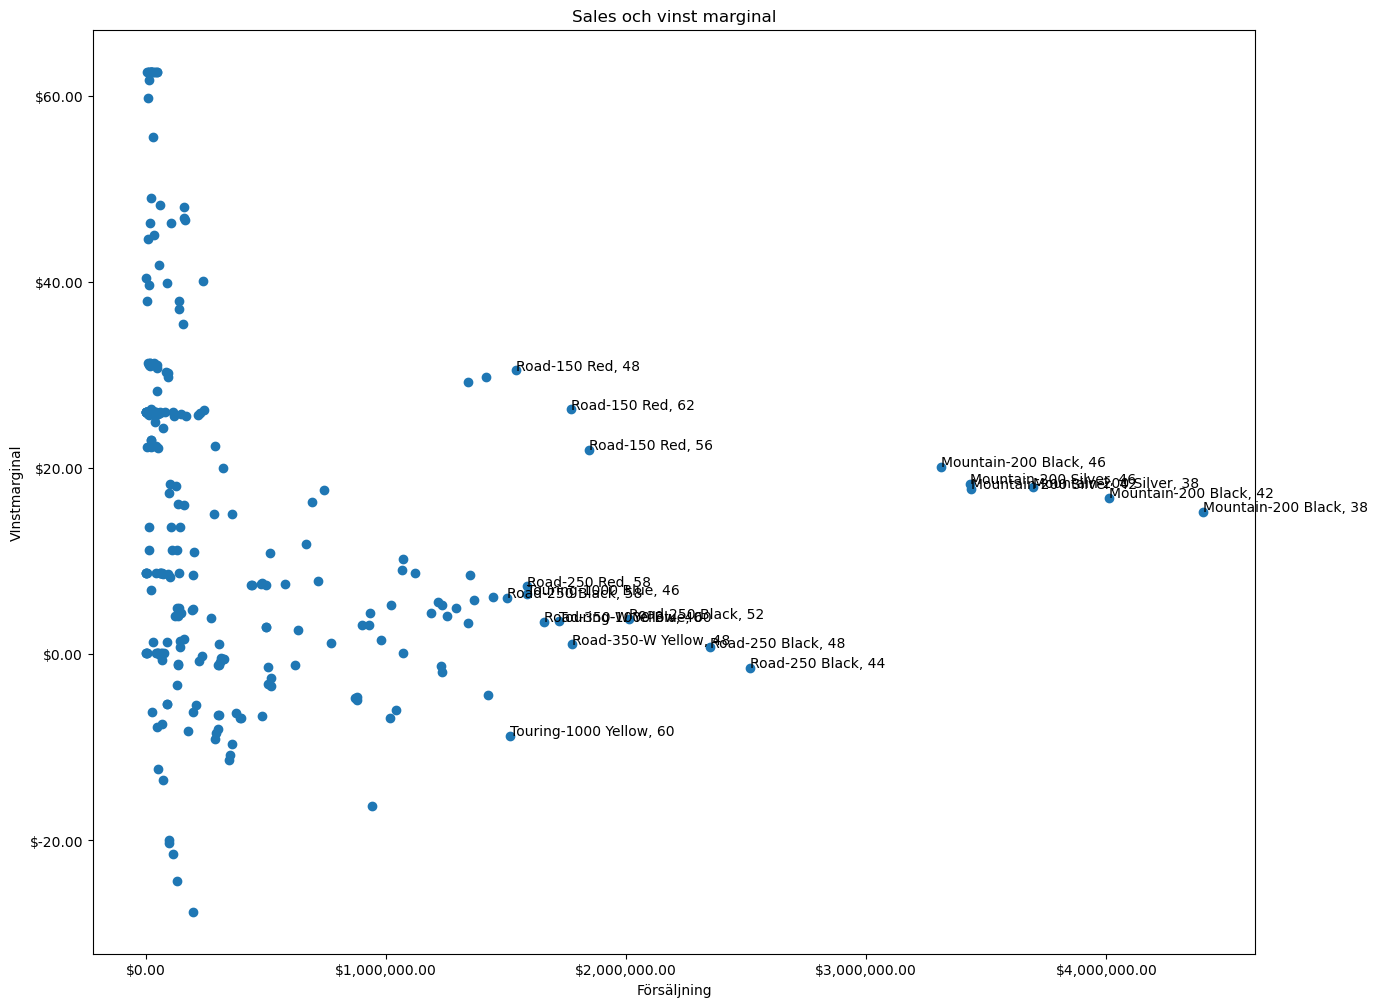

In [626]:
# Total sales per produkt i relation till profit marging, vistmarginal



per_sql_Stats ="""
SELECT
    p.Name AS ProductName, 
    SUM(od.LineTotal) AS TotalSales, 
    SUM(od.LineTotal - (od.OrderQty * p.StandardCost)) AS TotalProfit,
    (SUM(od.LineTotal - (od.OrderQty * p.StandardCost)) / SUM(od.LineTotal)) * 100 AS ProfitMargin
FROM 
    Sales.SalesOrderDetail od
    INNER JOIN Production.Product p ON od.ProductID = p.ProductID
GROUP BY 
    p.Name
ORDER BY 
    ProfitMargin DESC;
"""
df_stats = pd.read_sql(sql=per_sql_Stats, con=connection)

fig, ax_stats = plt.subplots(figsize=(15, 12))
#ax_S2.set_index('SalesYear', inplace=True)
ax_stats.scatter(df_stats['TotalSales'],df_stats['ProfitMargin'])

# Apply the custom formatter to the secondary y-axis, importing matplotlib.ticker import FuncFormatter and create a dollar formatter function
def dollar_formatter(x, pos):
    return "${:,.2f}".format(x)
ax_stats.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
ax_stats.xaxis.set_major_formatter(FuncFormatter(dollar_formatter))

for i, txt in enumerate(df_stats['ProductName']):
   if df_stats['TotalSales'][i]>1500000: ax_stats.annotate(txt, (df_stats['TotalSales'][i], df_stats['ProfitMargin'][i]))

ax_stats.set_title('Sales och vinst marginal')
ax_stats.set_xlabel('Försäljning')
ax_stats.set_ylabel('VInstmarginal')
#ax2.set_ylabel('sales', color='b')


# Show the plot
plt.show()




Mean 15.537584210526317
Median 10.53245
STD 19.37745397348142
Max 62.6
Min -27.6653
n:  266
ShapiroResult(statistic=0.9418956637382507, pvalue=9.36412547503096e-09)
intervaller där man med 95% sannolikhet att medelvärdet kommer ligga mellan är  (13.19825163290977, 17.876916788142864)
i nedan Histogram så ser man att detär hyfsat normalfördelat, boxplot visar den organga linjen nästa i mitten.
När jag studerat data setet, så ligger det nästan 50 rader på 25.99-26.00 och detta syns tydligt i plotten. Jag hade undersökt detta och exkluderat dessa


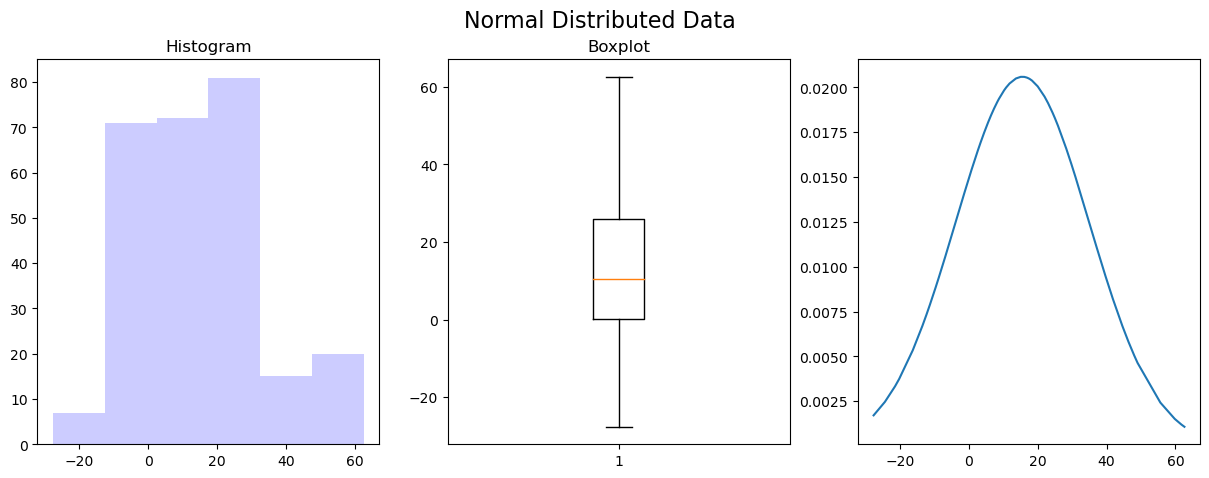

In [625]:
# Statistisk analys PROFIT MARGIN

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t


per_sql_Stat ="""

SELECT
    p.Name AS ProductName, 
    SUM(od.LineTotal) AS TotalSales, 
    SUM(od.LineTotal - (od.OrderQty * p.StandardCost)) AS TotalProfit,
    (SUM(od.LineTotal - (od.OrderQty * p.StandardCost)) / SUM(od.LineTotal)) * 100 AS ProfitMargin
FROM 
    Sales.SalesOrderDetail od
    INNER JOIN Production.Product p ON od.ProductID = p.ProductID
GROUP BY 
    p.Name
ORDER BY 
    ProfitMargin DESC;
"""
df_stat = pd.read_sql(sql=per_sql_Stat, con=connection)



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Normal Distributed Data', fontsize=16)

#axs[0].hist(x)
axs[0].hist(df_stat['ProfitMargin'], bins=6, color='b',alpha=0.2)
axs[0].set_title('Histogram')

axs[1].boxplot(df_stat['ProfitMargin'])
axs[1].set_title('Boxplot')


axs[2].plot(df_stat['ProfitMargin'],  norm.pdf(df_stat['ProfitMargin'], df_stat['ProfitMargin'].mean(), df_stat['ProfitMargin'].std()))

print("Mean",df_stat['ProfitMargin'].mean() )
print("Median",df_stat['ProfitMargin'].median())
print("STD",df_stat['ProfitMargin'].std())
print("Max",df_stat['ProfitMargin'].max() )
print("Min",df_stat['ProfitMargin'].min() )



# Calculate a 95% confidence interval
mean = df_stat['ProfitMargin'].mean() 
std = df_stat['ProfitMargin'].std()
n =  len( df_stat)

print("n: ",n)

#res = st.shapiro(df_stat['ProfitMargin'])
#print(res.statistic," är större än 0.05 så vi kan säga att den är nollfördelad")
print(st.shapiro(df_stat['ProfitMargin']))

# Calculate a 95% confidence intervall
print("intervaller där man med 95% sannolikhet att medelvärdet kommer ligga mellan är ",t.interval(0.95, n-1, mean, std/np.sqrt(n)))
print("i nedan Histogram så ser man att detär hyfsat normalfördelat, boxplot visar den organga linjen nästa i mitten.")
print("När jag studerat data setet, så ligger det nästan 50 rader på 25.99-26.00 och detta syns tydligt i plotten. Jag hade undersökt detta och exkluderat dessa")


In [623]:
st.shapiro(df_stat['ProfitMargin'])


ShapiroResult(statistic=0.9418956637382507, pvalue=9.36412547503096e-09)